/bin/bash: line 1: mamba: command not found
Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02 

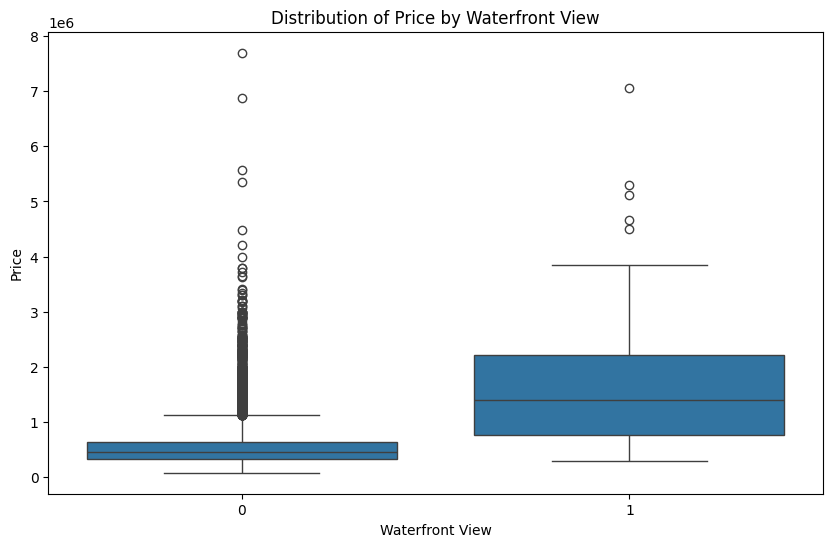

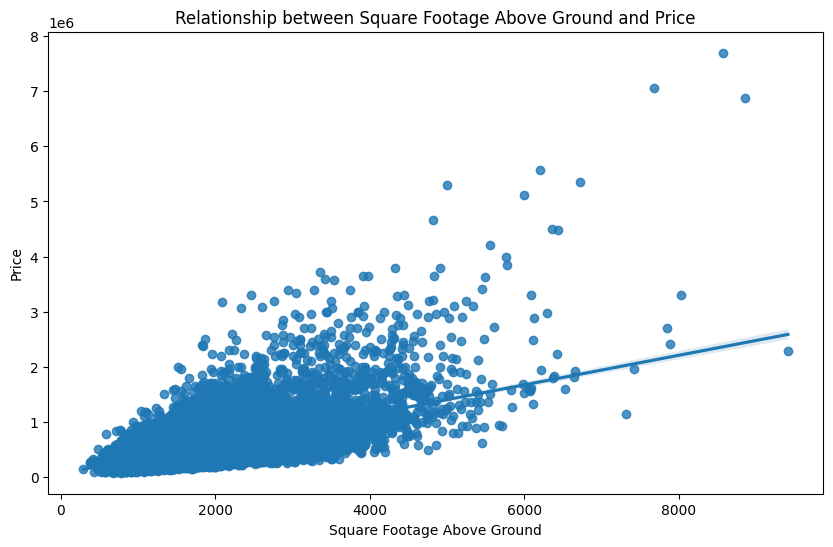

R^2 Score: 0.4928532179037931
R^2 Score: 0.6578409661299078
R^2 Score: 0.7504311824198735
R^2 Score: 0.6568035759606469
R^2 Score: 0.690598107932554


In [13]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

!pip install -U scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

!pip install seaborn

import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
download(filepath, "housing.csv")

file_name="housing.csv"

df = pd.read_csv(file_name)

# Display the data types of each column
print(df.dtypes)

# Drop the columns "id" and "Unnamed: 0" from axis 1
df.drop(columns=["id", "Unnamed: 0"], inplace=True)

# Obtain a statistical summary of the data
summary = df.describe()
print(summary)

# Use value_counts() to count the number of houses with unique floor values
floor_counts = df['floors'].value_counts()

# Convert the result to a DataFrame using to_frame()
floor_counts_df = floor_counts.to_frame()

print(floor_counts_df)

# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)

# Add labels and title
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.title('Distribution of Price by Waterfront View')

# Show the plot
plt.show()

# Create a scatter plot with regression line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df)

# Add labels and title
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price')
plt.title('Relationship between Square Footage Above Ground and Price')

# Show the plot
plt.show()

# Extract features and target variable
X = df[['sqft_living']]  # Feature
y = df['price']          # Target variable

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print("R^2 Score:", r2)

# Define the list of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade",
            "sqft_living"]

# Drop rows with missing values in any of the specified features
df_cleaned = df[features + ['price']].dropna()

# Extract features and target variable
X = df_cleaned[features]  # Features
y = df_cleaned['price']   # Target variable

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print("R^2 Score:", r2)

# Define the list of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade",
            "sqft_living"]

# Drop rows with missing values in any of the specified features
df_cleaned = df[features + ['price']].dropna()

# Extract features and target variable
X = df_cleaned[features]  # Features
y = df_cleaned['price']   # Target variable

# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Make predictions
y_pred = pipeline.predict(X)

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print("R^2 Score:", r2)

# Define the features and target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade",
            "sqft_living"]
X = df[features]
y = df['price']

# Drop rows with missing values in any of the specified features
df_cleaned = df[features + ['price']].dropna()

# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[features], df_cleaned['price'], test_size=0.2, random_state=42)

# Create and fit the Ridge regression object
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Drop rows with missing values in any of the specified features
df_cleaned = df[features + ['price']].dropna()

# Define the features and target variable
X = df_cleaned[features]
y = df_cleaned['price']

# Perform second-order polynomial transform on the features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create and fit the Ridge regression object with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the transformed test data
y_pred = ridge_model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)